In [232]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

In [206]:
data = pd.read_csv("./Raemian_final.csv")

In [207]:
data

,계약년월,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate,평당가
0,202010,10,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10383.036720
1,202010,10,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10383.036720
2,202010,4,강남구,2020,"10,094,921","6,809,825",96.2,"12,057","5,725","24,492.21",...,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54,10647.853810
3,202011,17,강남구,2020,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,10758.194260
4,202011,17,강남구,2020,"13,510,590","8,663,124",96.4,"9,619","5,807","26,045.45",...,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79,10758.194260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,202204,21,마포구,2014,"15,206,688","9,052,434",104.2,130,"-2,370","11,100.76",...,-0.016817,34314.99004,0.008382,1617.01,-3.08,2695.05,-2.27,904.75,-4.21,7560.510686
8371,202205,17,마포구,2014,"14,845,927","7,537,472",104.2,"3,796","-1,577","11,610.39",...,-0.116800,32379.46280,-0.056405,1615.30,-0.11,2685.90,-0.34,893.36,-1.26,7301.491662
8372,202208,7,마포구,2014,"13,709,893","7,038,729",103.4,"-2,912","-9,422","8,700.34",...,0.081533,33009.56488,0.046749,1468.88,-0.18,2472.05,0.84,807.04,0.43,7993.599664
8373,202209,5,마포구,2014,"15,299,641","8,373,286",102.6,"2,089","-3,837","7,955.08",...,-0.092871,30649.55952,-0.071495,1273.87,-13.28,2155.49,-12.81,672.65,-16.65,6678.431040


In [208]:
print(data["매칭 구"].unique())

['강남구' '강동구' '강북구' '광진구' '구로구' '도봉구' '동대문구' '동작구' '마포구' '서대문구' '서초구' '성동구'
 '성북구' '송파구' '양천구' '영등포구' '용산구' '은평구' '중구']


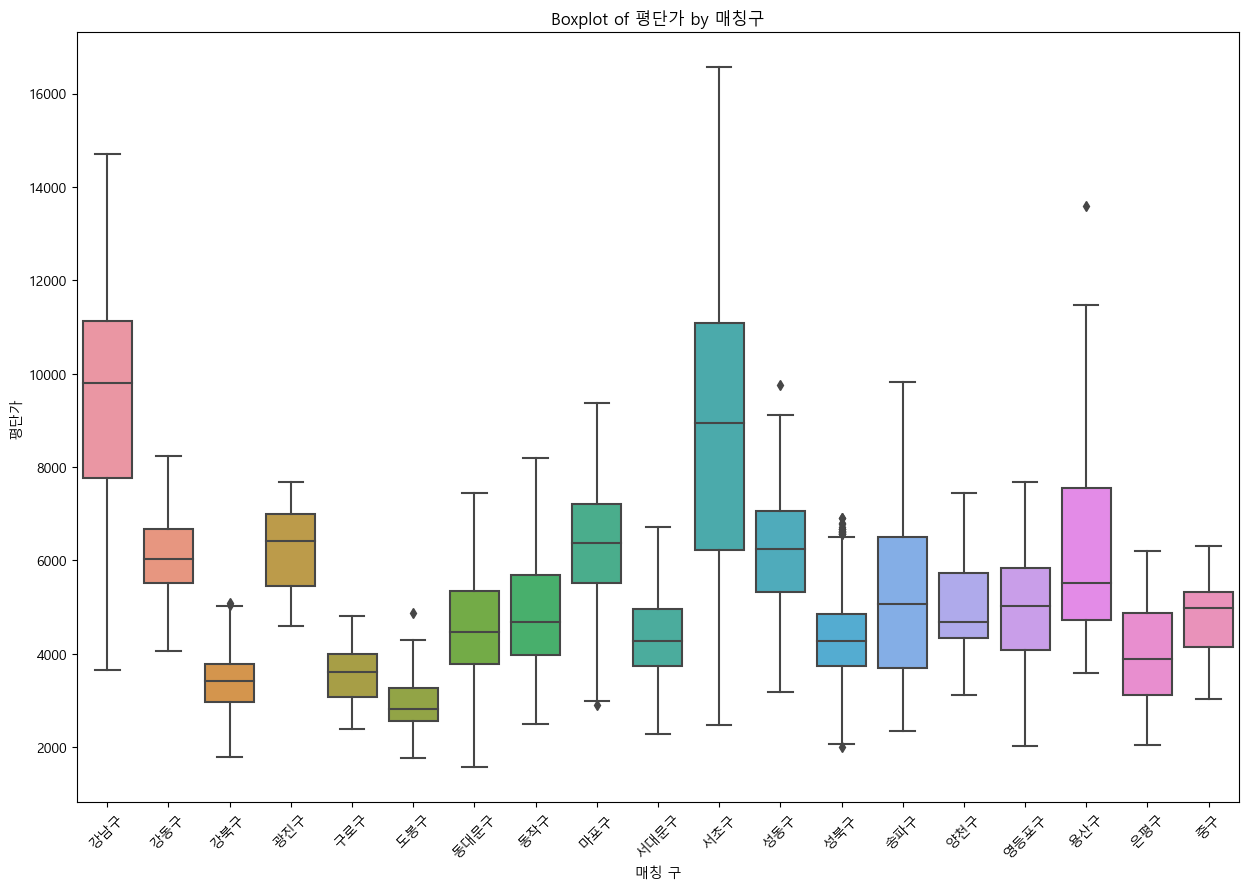

매칭 구
강남구     9489.495136
강동구     6124.712120
강북구     3397.360546
광진구     6203.757393
구로구     3578.316768
도봉구     2887.165167
동대문구    4569.483063
동작구     4891.786525
마포구     6298.149752
서대문구    4353.938986
서초구     8536.993238
성동구     6215.664085
성북구     4285.623575
송파구     5200.686102
양천구     4960.984637
영등포구    4976.811652
용산구     6077.349413
은평구     4057.835778
중구      4784.369367
Name: 평당가, dtype: float64

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converting '평단가' to numeric (as it seems to be a string)
data['평당가'] = pd.to_numeric(data['평당가'], errors='coerce')

# Grouping data by '매칭구'
grouped_data = data.groupby('매칭 구')

# Creating boxplots for each group's '평단가' to visualize outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='매칭 구', y='평당가', data=data)
plt.xticks(rotation=45)
plt.title('Boxplot of 평단가 by 매칭구')
plt.ylabel('평단가')
plt.xlabel('매칭 구')
plt.show()

# Identifying and removing outliers for each group in '평단가'
# Using IQR (Interquartile Range) method
cleaned_data = pd.DataFrame()
for name, group in grouped_data:
    Q1 = group['평당가'].quantile(0.25)
    Q3 = group['평당가'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group[(group['평당가'] >= lower_bound) & (group['평당가'] <= upper_bound)]
    cleaned_data = pd.concat([cleaned_data, filtered_group], axis=0)

# Calculating the mean of '평단가' for each group in the cleaned data
mean_prices = cleaned_data.groupby('매칭 구')['평당가'].mean()
mean_prices


##이상치를 제거한, 0.25~0.75만 확인해보기!

하위 25% :  7769.8367965
상위 25% :  11135.9387425
강남구 평균 평당가:  9489.495136221567
강남구 전체 개수 : 510
강남구 필터링 개수 510
이상치 개수(제거) : 0


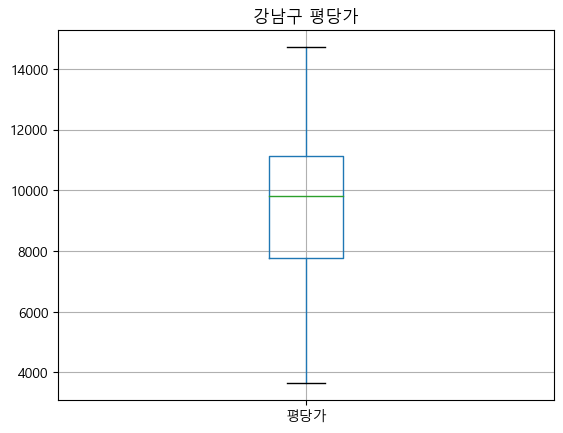

하위 25% :  5517.95374375
상위 25% :  6675.597463
강동구 평균 평당가:  6124.712120006757
강동구 전체 개수 : 740
강동구 필터링 개수 740
이상치 개수(제거) : 0


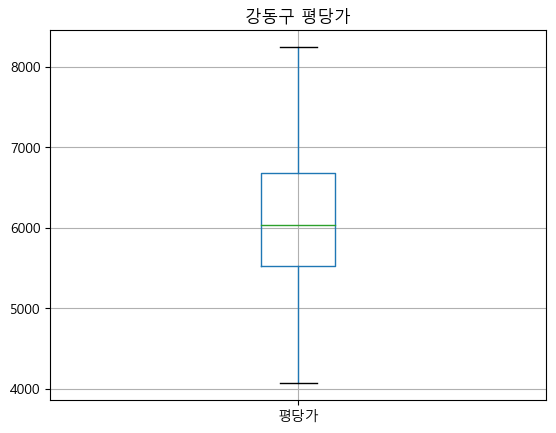

하위 25% :  2956.8177
상위 25% :  3780.483623
강북구 평균 평당가:  3407.4670677939393
강북구 전체 개수 : 330
강북구 필터링 개수 328
이상치 개수(제거) : 2


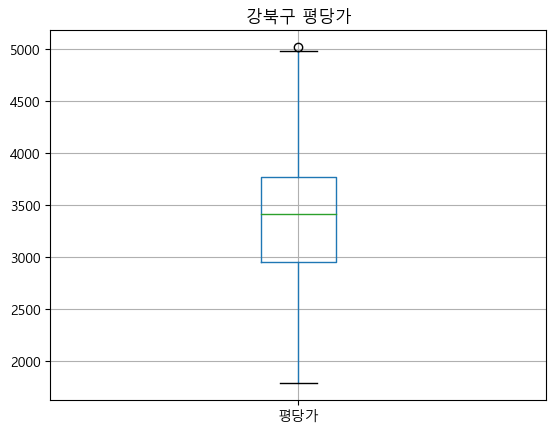

하위 25% :  5446.128501
상위 25% :  6993.73272575
광진구 평균 평당가:  6203.75739332
광진구 전체 개수 : 50
광진구 필터링 개수 50
이상치 개수(제거) : 0


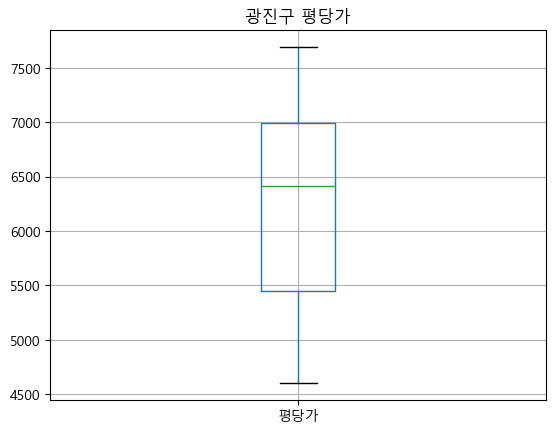

하위 25% :  3067.735333
상위 25% :  3999.807981
구로구 평균 평당가:  3578.316768419048
구로구 전체 개수 : 105
구로구 필터링 개수 105
이상치 개수(제거) : 0


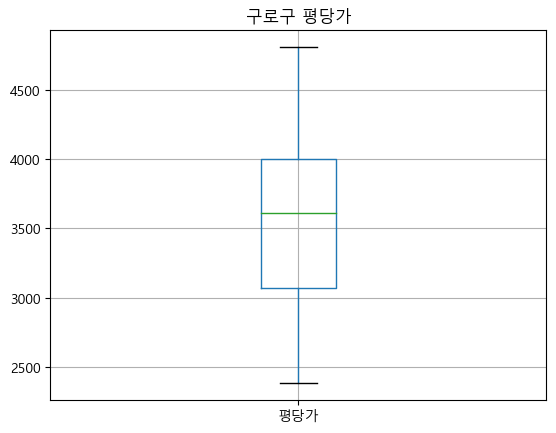

하위 25% :  nan
상위 25% :  nan
노원구 평균 평당가:  nan
노원구 전체 개수 : 0
노원구 필터링 개수 0
이상치 개수(제거) : 0


C:\Users\vivid\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


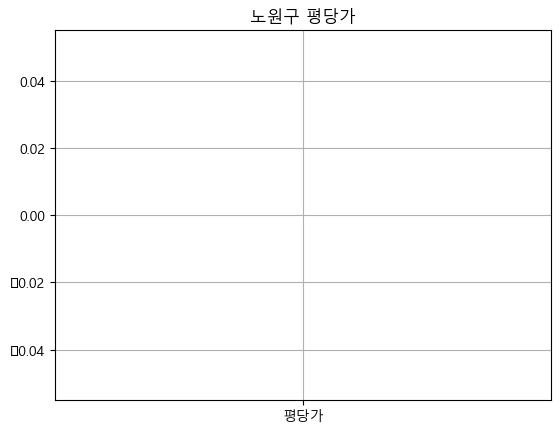

하위 25% :  3772.95706675
상위 25% :  5355.190872499999
동대문구 평균 평당가:  4569.483062628635
동대문구 전체 개수 : 894
동대문구 필터링 개수 894
이상치 개수(제거) : 0


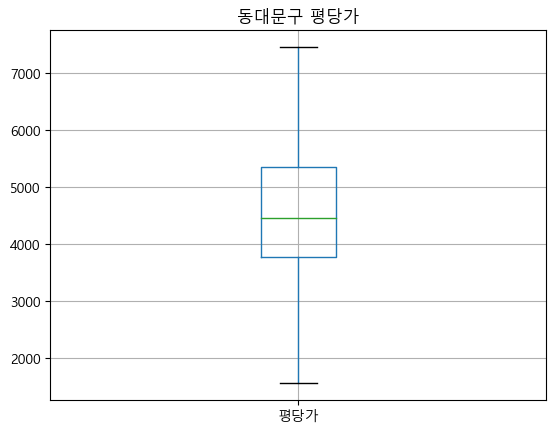

하위 25% :  3982.771034
상위 25% :  5679.534008
동작구 평균 평당가:  4891.78652452506
동작구 전체 개수 : 419
동작구 필터링 개수 419
이상치 개수(제거) : 0


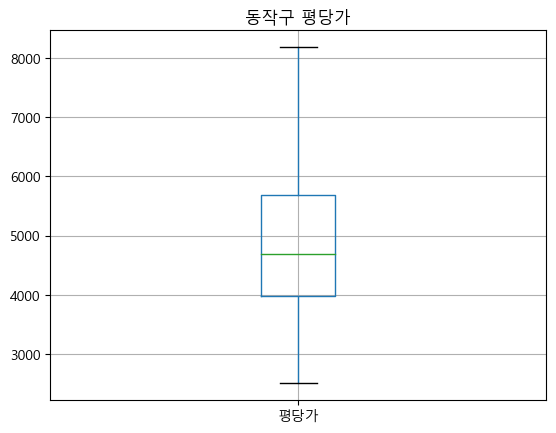

하위 25% :  5505.977569
상위 25% :  7204.13844
마포구 평균 평당가:  6295.440868312052
마포구 전체 개수 : 1253
마포구 필터링 개수 1252
이상치 개수(제거) : 1


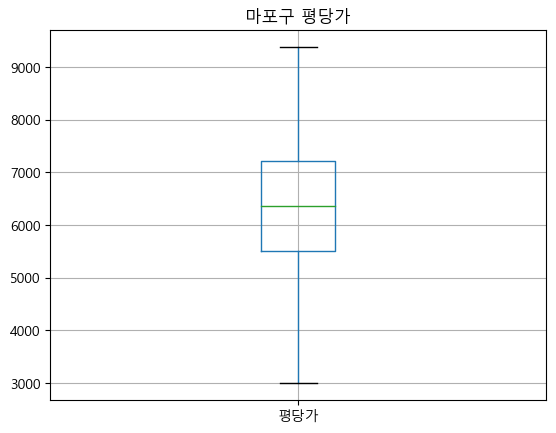

하위 25% :  3732.93079725
상위 25% :  4961.18059
서대문구 평균 평당가:  4353.938985520179
서대문구 전체 개수 : 446
서대문구 필터링 개수 446
이상치 개수(제거) : 0


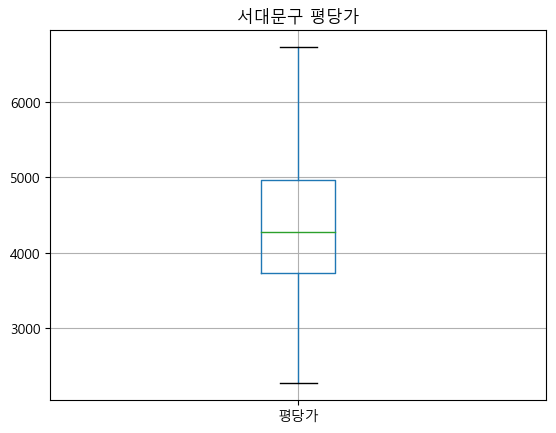

하위 25% :  6229.278059
상위 25% :  11093.28859
서초구 평균 평당가:  8536.99323817734
서초구 전체 개수 : 609
서초구 필터링 개수 609
이상치 개수(제거) : 0


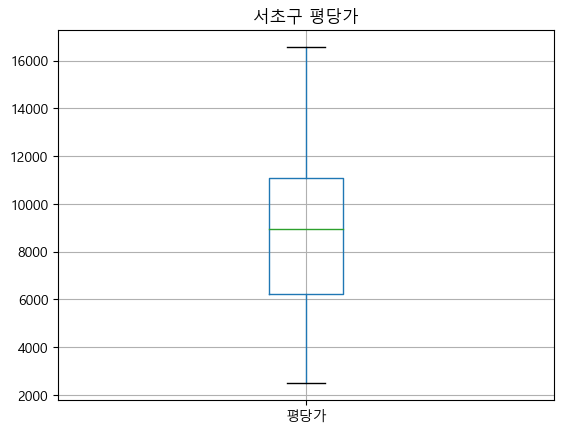

하위 25% :  5323.727649
상위 25% :  7053.548925
성동구 평균 평당가:  6231.158854445414
성동구 전체 개수 : 229
성동구 필터링 개수 228
이상치 개수(제거) : 1


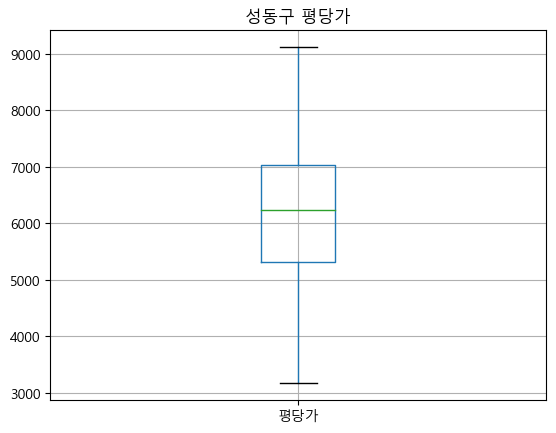

하위 25% :  3737.0489065
상위 25% :  4849.314886
성북구 평균 평당가:  4313.864252299373
성북구 전체 개수 : 1276
성북구 필터링 개수 1259
이상치 개수(제거) : 17


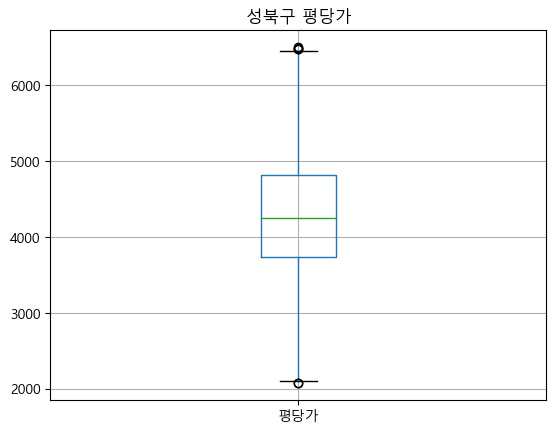

하위 25% :  3689.203935
상위 25% :  6504.875934
송파구 평균 평당가:  5200.686101766447
송파구 전체 개수 : 304
송파구 필터링 개수 304
이상치 개수(제거) : 0


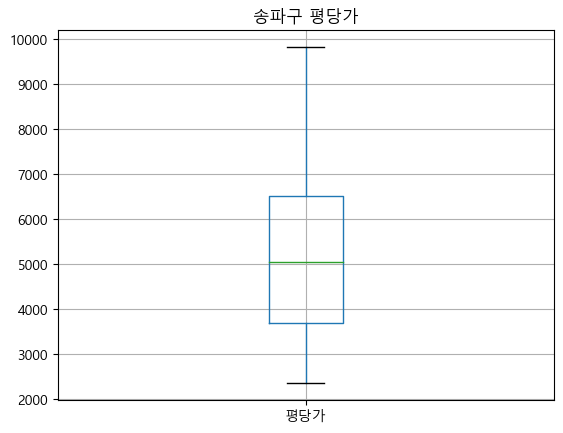

하위 25% :  4084.596376
상위 25% :  5835.137679
영등포구 평균 평당가:  4976.811652461988
영등포구 전체 개수 : 513
영등포구 필터링 개수 513
이상치 개수(제거) : 0


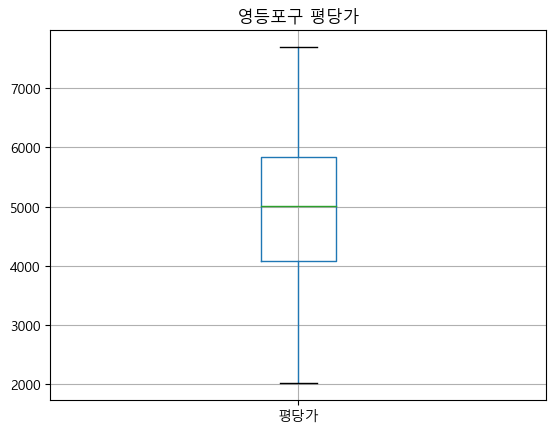

하위 25% :  4721.95538775
상위 25% :  7549.00761675
용산구 평균 평당가:  6130.284907225352
용산구 전체 개수 : 142
용산구 필터링 개수 141
이상치 개수(제거) : 1


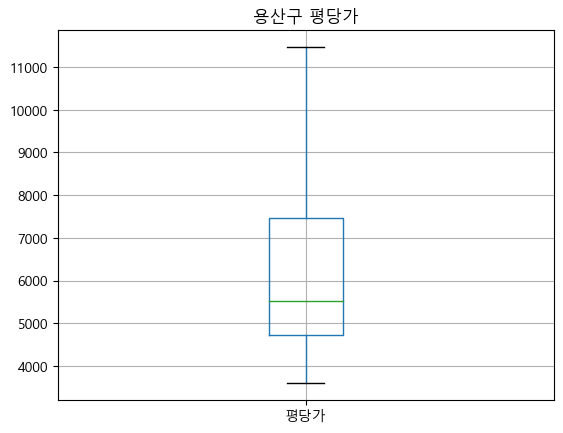

하위 25% :  3111.601087
상위 25% :  4874.2887545
은평구 평균 평당가:  4057.8357779464286
은평구 전체 개수 : 168
은평구 필터링 개수 168
이상치 개수(제거) : 0


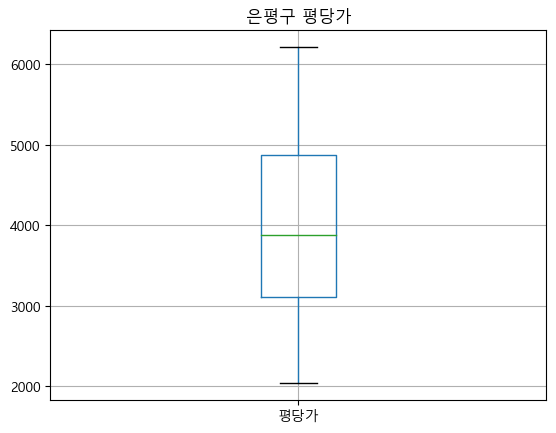

하위 25% :  4330.742358
상위 25% :  5737.703605
양천구 평균 평당가:  4960.984637
양천구 전체 개수 : 49
양천구 필터링 개수 49
이상치 개수(제거) : 0


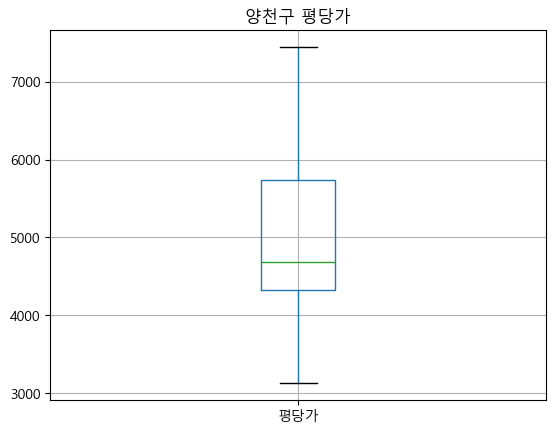

하위 25% :  4139.5447805
상위 25% :  5329.425747
중구 평균 평당가:  4784.369367253731
중구 전체 개수 : 67
중구 필터링 개수 67
이상치 개수(제거) : 0


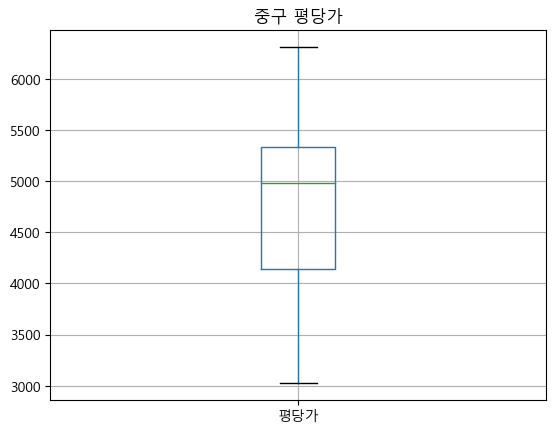

---------------------------------------
전체 시각화


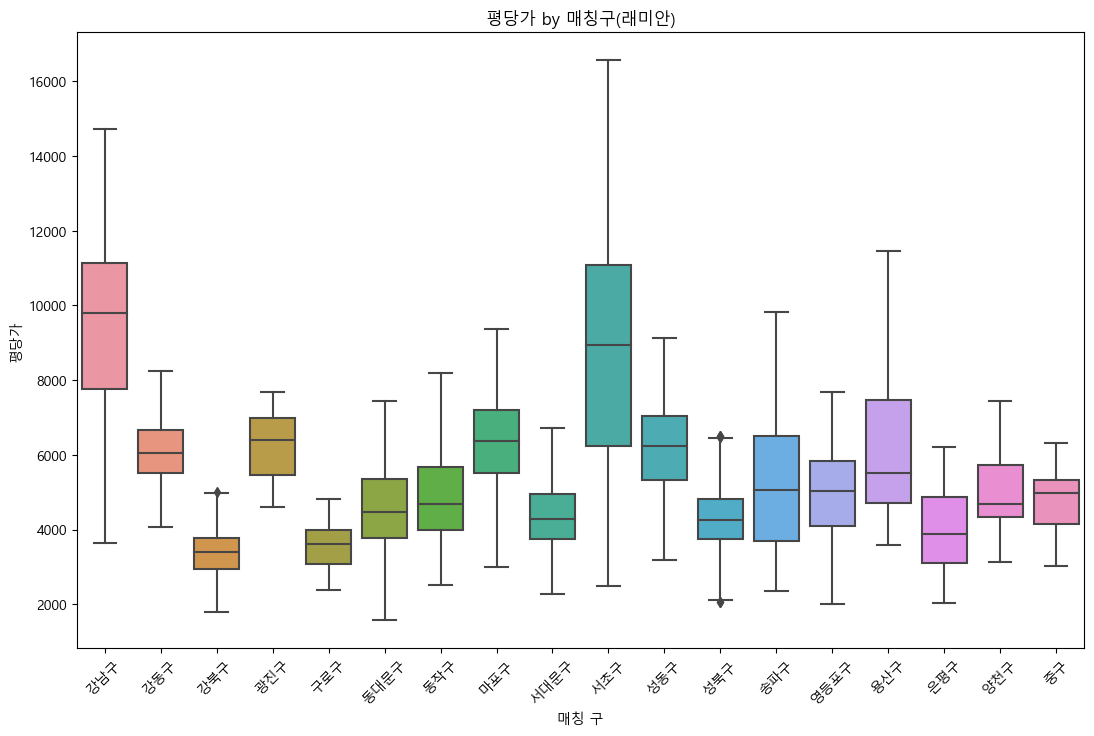

In [210]:
'''
매칭구, 각 구별 총 개수, 각 구별 이상치 개수, 각 구별 시각화, 각 구별 평단가, 전체 시각화
'''
filtered_data_total = pd.DataFrame()
def visualize(data, group):
    data = data[data['매칭 구'] == group]
    # low_limit = data["평당가"].quantile(0.25)
    # upper_limit = data['평당가'].quantile(0.75)

    Q1 = data["평당가"].quantile(0.25)
    Q3 = data["평당가"].quantile(0.75)
    IQR = Q3 - Q1
    

    # filtered_data = data[(data["평당가"] >= low_limit) & (data["평당가"] <= upper_limit)] #형준 수식(무작정 지우는 것)
    filtered_data = data[~((data['평당가'] < (Q1 - 1.5 * IQR)) | (data['평당가'] > (Q3 + 1.5 * IQR)))] #희진 수식
    #튀어나오는 값 있지만, 정상 범위내에 있다고 판단.
    global filtered_data_total
    filtered_data_total = pd.concat([filtered_data_total, filtered_data], ignore_index=True)
    
    outliers_count = len(data) - len(filtered_data)

    filtered_data_total.append(data, ignore_index=True)
    
    print("하위 25% : ", Q1)
    print("상위 25% : ", Q3)
    print(f"{group} 평균 평당가: ", data['평당가'].mean())
    print(f"{group} 전체 개수 :", len(data))
    print(f"{group} 필터링 개수", len(filtered_data))
    print("이상치 개수(제거) :", outliers_count) #이미 정수 개수




    #개별 box plot 그리기
    filtered_data.boxplot(column = "평당가")
    plt.title(f"{group} 평당가") #0.25~0.75% 사이 1차 필터링
    plt.show()

group = ['강남구', '강동구', '강북구', '광진구', '구로구', '노원구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '영등포구', '용산구', '은평구', '양천구', '중구']

for i in group:
    visualize(data, i)

print("---------------------------------------")
print("전체 시각화")


plt.figure(figsize=(13,8))
sns.boxplot(x="매칭 구", y="평당가", data=filtered_data_total)
plt.xticks(rotation = 45)
plt.title("평당가 by 매칭구(래미안)")
plt.ylabel("평당가")
plt.xlabel("매칭 구")
plt.show()



#데이터 문제 없이 이상치 제거

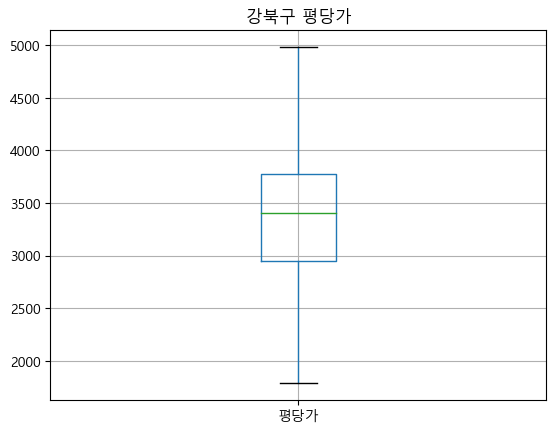

In [211]:

group_data = filtered_data_total[filtered_data_total["매칭 구"] == "강북구"]

group_data.boxplot(column = "평당가", showfliers=False)
plt.title("강북구 평당가")
plt.show()

# group_data.to_csv("./강북구.csv")

##filtered_data_total = data로 다시 수정해주기

In [212]:
data = filtered_data_total

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8082 entries, 0 to 8081
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                8082 non-null   int64  
 1   층                                   8082 non-null   int64  
 2   매칭 구                                8082 non-null   object 
 3   건축년도                                8082 non-null   int64  
 4   건설수주_건축(단위 백만원)                     8082 non-null   object 
 5   건설수주_주택(단위 백만원)                     8082 non-null   object 
 6   매매가격지수(아파트)                         8082 non-null   float64
 7   경상수지(백만불)                           8082 non-null   object 
 8   무역수지(백만불)                           8082 non-null   object 
 9   대출금액(아파트)(억원)                       8082 non-null   object 
 10  대출잔액(아파트)(억원)                       8082 non-null   object 
 11  서울_신규_분양세대(단위: 세대)                  8082 no

In [214]:
# object -> float 형으로 데이터타입 변환
# transaction_fee = data['거래금액(만원)']
CO_architecture = data['건설수주_건축(단위 백만원)']
CO_dwellinghouse = data['건설수주_주택(단위 백만원)']
current_balance = data['경상수지(백만불)']
trade_balance = data['무역수지(백만불)']
loan_amount = data['대출금액(아파트)(억원)']
loan_balance = data['대출잔액(아파트)(억원)']
Newly_Offered_Housing_Units_in_Seoul = data['서울_신규_분양세대(단위: 세대)']
employed_person = data['경제활동인구_취업자(단위: 천명)']
KOSPI = data['국제 주요국 주가지수(KOSPI)']
KRW_to_USD = data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원']

# transaction_fee_comma_removed = transaction_fee.apply(lambda x: x.replace(',', ''))
# data['거래금액(만원)'] = transaction_fee_comma_removed.astype(float)
CO_architecture_comma_removed = CO_architecture.apply(lambda x: x.replace(',', ''))
data['건설수주_건축(단위 백만원)'] = CO_architecture_comma_removed.astype(float)
CO_dwellinghouse_comma_removed = CO_dwellinghouse.apply(lambda x: x.replace(',', ''))
data['건설수주_주택(단위 백만원)'] = CO_dwellinghouse_comma_removed.astype(float)
current_balance_comma_removed = current_balance.apply(lambda x: x.replace(',', ''))
data['경상수지(백만불)'] = current_balance_comma_removed.astype(float)
trade_balance_comma_removed = trade_balance.apply(lambda x: x.replace(',', ''))
data['무역수지(백만불)'] = trade_balance_comma_removed.astype(float)
loan_amount_comma_removed = loan_amount.apply(lambda x: x.replace(',', ''))
data['대출금액(아파트)(억원)'] = loan_amount_comma_removed.astype(float)
loan_balance_comma_removed = loan_balance.apply(lambda x: x.replace(',', ''))
data['대출잔액(아파트)(억원)'] = loan_balance_comma_removed.astype(float)
Newly_Offered_Housing_Units_in_Seoul_comma_removed = Newly_Offered_Housing_Units_in_Seoul.apply(lambda x: x.replace(',', ''))
data['서울_신규_분양세대(단위: 세대)'] = Newly_Offered_Housing_Units_in_Seoul_comma_removed.astype(float)
employed_person_comma_removed = employed_person.apply(lambda x: x.replace(',', ''))
data['경제활동인구_취업자(단위: 천명)'] = employed_person_comma_removed.astype(float)
KOSPI_comma_removed = KOSPI.apply(lambda x: x.replace(',', ''))
data['국제 주요국 주가지수(KOSPI)'] = KOSPI_comma_removed.astype(float)
KRW_to_USD_comma_removed = KRW_to_USD.apply(lambda x: x.replace(',', ''))
data['원화의 대미달러, 원화의 대위안/대엔 환율(원/달러(종가)_원'] = KRW_to_USD_comma_removed.astype(float)

# 데이터 정리는 완료함!
-target encoding 진행하기 위해서 train, test를 나눠서 진행해야함

# 아파트 건물면적 106개 빈 값 제거

In [215]:
data = data.dropna(subset=["아파트 건물면적_(천)"])

In [216]:
data.info() #매칭구를 제외하고는 데이터가 문제 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7970 entries, 0 to 8081
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   계약년월                                7970 non-null   int64  
 1   층                                   7970 non-null   int64  
 2   매칭 구                                7970 non-null   object 
 3   건축년도                                7970 non-null   int64  
 4   건설수주_건축(단위 백만원)                     7970 non-null   float64
 5   건설수주_주택(단위 백만원)                     7970 non-null   float64
 6   매매가격지수(아파트)                         7970 non-null   float64
 7   경상수지(백만불)                           7970 non-null   float64
 8   무역수지(백만불)                           7970 non-null   float64
 9   대출금액(아파트)(억원)                       7970 non-null   float64
 10  대출잔액(아파트)(억원)                       7970 non-null   float64
 11  서울_신규_분양세대(단위: 세대)                  7970 no

train(X)값과 target(y)값 나눠주기

In [217]:
train = data.iloc[:, :42]
target = data.iloc[:, -1]

In [218]:
train

,계약년월,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
0,202010,10,강남구,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,...,11435.23411,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
1,202010,10,강남구,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,...,11435.23411,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
2,202010,4,강남구,2020,10094921.0,6809825.0,96.2,12057.0,5725.0,24492.21,...,11435.23411,0.031253,28005.10502,0.009797,1392.21,-3.03,2267.15,-2.61,792.65,-6.54
3,202011,17,강남구,2020,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,11794.46152,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
4,202011,17,강남구,2020,13510590.0,8663124.0,96.4,9619.0,5807.0,26045.45,...,11794.46152,0.031414,29124.03662,0.039955,1593.06,14.43,2591.34,14.30,886.11,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077,202105,8,중구,2011,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,13520.22905,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17
8078,202109,13,중구,2011,12260118.0,7540232.0,102.7,9510.0,4278.0,19440.64,...,15023.53855,0.011242,34688.42132,-0.015763,1832.44,-4.26,3068.82,-4.08,1003.27,-3.38
8079,202110,8,중구,2011,12431593.0,7449740.0,103.5,7904.0,1812.0,19290.86,...,14879.01232,-0.009620,35055.51786,0.010583,1776.47,-3.05,2970.68,-3.20,992.33,-1.09
8080,202206,12,중구,2011,19081016.0,9429872.0,104.1,6064.0,-2470.0,13267.09,...,11418.91908,-0.034727,31446.71280,-0.028807,1395.39,-13.61,2332.64,-13.15,745.44,-16.56


In [219]:
target

0       10383.036720
1       10383.036720
2       10647.853810
3       10758.194260
4       10758.194260
            ...     
8077     6308.356210
8078     5329.425747
8079     5368.326665
8080     5329.425747
8081     5976.337462
Name: 평당가, Length: 7970, dtype: float64

train, target 문제없이 바뀜

# 매칭 구 -> Target Encoding 진행하기

In [220]:
#먼저 데이터 나눠주기
#모델 import
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, r2_score


In [221]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

#train 0.6 / val 0.2 / test 0.2
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(4782, 42) (1594, 42) (1594, 42) (4782,) (1594,) (1594,)


In [222]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(X_train.dtypes[X_train.dtypes == "object"].index) #object값 list에 넣음
categorical_features.append('계약년월')
# 추출된 문자열 변수 확인
display(categorical_features) #Target encoding 할 값 추출

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    X_train[i] = le.fit_transform(X_train[i], y_train)
    X_val[i] = le.transform(X_val[i], y_val)
    X_test[i] = le.transform(X_test[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(X_train)
display(X_test)

['매칭 구', '계약년월']

,계약년월,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
859,6323.599516,7,6186.335411,2016,14183240.0,8377800.0,98.6,518.0,335.0,24472.18,...,13900.437970,0.055557,33803.28609,0.044172,1912.68,1.37,3147.86,2.82,983.45,2.85
2195,4412.531225,5,4573.186932,2014,9277921.0,4933751.0,94.3,6708.0,3935.0,46673.00,...,9418.850021,0.020089,28519.73160,-0.012474,1220.65,-5.51,1987.01,-6.23,610.73,-4.94
2436,6017.762594,11,4573.186932,2004,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,13520.229050,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17
3282,5434.171691,4,6347.974841,2000,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.76,...,11212.290500,0.067851,27821.36728,0.054406,1429.09,3.00,2326.17,3.41,848.24,4.04
278,6728.134730,8,9477.038638,2020,12260118.0,7540232.0,102.7,9510.0,4278.0,19440.64,...,15023.538550,0.011242,34688.42132,-0.015763,1832.44,-4.26,3068.82,-4.08,1003.27,-3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,5434.171691,16,4573.186932,2019,11166912.0,8580561.0,95.8,6589.0,3651.0,18465.76,...,11212.290500,0.067851,27821.36728,0.054406,1429.09,3.00,2326.17,3.41,848.24,4.04
7788,6389.083171,46,6158.771386,2015,15448828.0,8843858.0,100.0,9972.0,4350.0,18224.72,...,14097.169080,0.042672,34289.90678,0.000572,1986.96,2.81,3296.68,2.90,1029.96,4.91
4697,6017.762594,4,4363.374930,2001,11699841.0,5568538.0,99.0,11307.0,2814.0,21924.71,...,13520.229050,-0.027352,34270.30859,0.013816,1932.64,1.04,3203.92,1.78,981.78,-0.17
3467,5919.308608,5,6347.974841,2014,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,12619.050910,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29


,계약년월,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),매매가격지수(아파트),경상수지(백만불),무역수지(백만불),대출금액(아파트)(억원),...,NASDAQ_close,NASDAQ_change_rate,DOW Jones_close,DOW Jones_change_rate,KRX300_close,KRX300_change_rate,KOSPI_close,KOSPI_change_rate,KOSDAQ_close,KOSDAQ_change_rate
2761,5217.794400,16,4893.770627,2003,12384775.0,7770008.0,96.1,10672.0,8420.0,20667.71,...,11088.679970,-0.011025,27733.39639,-0.003162,1435.75,0.47,2327.89,0.07,848.15,-0.01
5358,4413.370110,5,6288.233978,2001,9765035.0,5656161.0,94.4,5826.0,4363.0,42474.39,...,7772.205833,-0.174824,22637.42081,-0.206254,1089.34,-10.76,1754.64,-11.69,569.07,-6.82
5326,6962.261708,6,8483.724996,2003,14255366.0,7191926.0,104.2,6771.0,-24.0,12239.06,...,13623.262950,-0.019819,34029.74066,-0.017858,1668.36,1.35,2757.65,2.17,944.53,7.20
6564,6389.083171,10,4288.012855,2021,15448828.0,8843858.0,100.0,9972.0,4350.0,18224.72,...,14097.169080,0.042672,34289.90678,0.000572,1986.96,2.81,3296.68,2.90,1029.96,4.91
6526,6091.234463,12,4288.012855,2005,10589107.0,6436523.0,97.0,5762.0,3550.0,25979.03,...,13186.605780,0.044976,30821.35259,0.022315,1847.35,2.93,2976.21,3.58,928.73,-4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,5919.308608,11,4573.186932,2007,22231493.0,15138239.0,96.6,12063.0,6694.0,34654.82,...,12619.050910,0.069913,30148.57990,0.035179,1794.81,12.66,2873.47,10.89,968.42,9.29
6528,6083.183539,10,4288.012855,2005,10479357.0,5379397.0,97.7,6520.0,2302.0,27830.63,...,13737.403630,0.041769,31283.90985,0.015008,1861.65,0.77,3012.95,1.23,913.94,-1.59
3776,6323.599516,4,6347.974841,2000,14183240.0,8377800.0,98.6,518.0,335.0,24472.18,...,13900.437970,0.055557,33803.28609,0.044172,1912.68,1.37,3147.86,2.82,983.45,2.85
2860,5053.648869,5,4893.770627,2003,16637293.0,10008122.0,94.3,7039.0,3419.0,18057.24,...,9839.971325,0.080644,26062.27015,0.073802,1294.84,4.59,2108.33,3.88,737.97,3.40


# 정규화

In [223]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #
X_train_scaler = scaler.fit_transform(X_train)
X_val_scaler = scaler.fit_transform(X_val)
X_test_scaler = scaler.fit_transform(X_test)


In [224]:
X_train_scaler

array([[ 0.97309494, -0.59421963,  0.34344514, ...,  0.06736454,
         1.0471231 ,  0.03868508],
       [-1.68294181, -0.87592462, -0.66376134, ..., -1.4805006 ,
        -1.83852337, -1.20343945],
       [ 0.54803734, -0.03080964, -0.66376134, ..., -0.11051167,
         1.03419374, -0.44285742],
       ...,
       [ 0.54803734, -1.01677712, -0.7947623 , ..., -0.11051167,
         1.03419374, -0.44285742],
       [ 0.41120423, -0.87592462,  0.44436845, ...,  1.44761556,
         0.93075889,  1.06555054],
       [ 0.41120423, -0.73507213, -0.42274913, ...,  1.44761556,
         0.93075889,  1.06555054]])

#상관관계 행렬을 통한 시각화

#VIF를 통한 다중공선성 측정

In [225]:
#original columns 가져오기
original_columns = X_train.columns.tolist().copy()

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    # VIF 값을 문자열로 변환하지 않고 계산
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

In [227]:
vif_df = calculate_vif(X_train)
print(vif_df)

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                               feature           VIF
0                                 계약년월           inf
1                                    층  1.048326e+00
2                                 매칭 구  1.054459e+00
3                                 건축년도  1.056936e+00
4                      건설수주_건축(단위 백만원)  4.503600e+15
5                      건설수주_주택(단위 백만원)  1.125900e+15
6                          매매가격지수(아파트)           inf
7                            경상수지(백만불)           inf
8                            무역수지(백만불)  9.007199e+15
9                        대출금액(아파트)(억원)           inf
10                       대출잔액(아파트)(억원)           inf
11                  서울_신규_분양세대(단위: 세대)  4.503600e+15
12                   아파트 동(호)수_(단위: 호)           inf
13                        아파트 건물면적_(천)           inf
14                        생산자물가지수 총지수   9.007199e+15
15                 전규모(1인이상) 전체임금총액[원]  1.000800e+15
16                        소비자물가지수 총지수            inf
17             소비자물가지수 주택, 수도, 전기 및 연료  9.0071

In [228]:
#값 쉽게 보기
vif_df['VIF'] = vif_df['VIF'].apply(lambda x: f"{x:.2f}")

# 결과 출력
print(vif_df)

                               feature                  VIF
0                                 계약년월                  inf
1                                    층                 1.05
2                                 매칭 구                 1.05
3                                 건축년도                 1.06
4                      건설수주_건축(단위 백만원)  4503599627370496.00
5                      건설수주_주택(단위 백만원)  1125899906842624.00
6                          매매가격지수(아파트)                  inf
7                            경상수지(백만불)                  inf
8                            무역수지(백만불)  9007199254740992.00
9                        대출금액(아파트)(억원)                  inf
10                       대출잔액(아파트)(억원)                  inf
11                  서울_신규_분양세대(단위: 세대)  4503599627370496.00
12                   아파트 동(호)수_(단위: 호)                  inf
13                        아파트 건물면적_(천)                  inf
14                        생산자물가지수 총지수   9007199254740992.00
15                 전규모(1인이상) 전체임금총액[원]  

In [229]:
# 'VIF' 열을 실수형으로 변환
vif_df['VIF'] = pd.to_numeric(vif_df['VIF'], errors='coerce')

# VIF 값이 무한대가 아닌 특성만 필터링
vif_data_check = vif_df[vif_df['VIF'] != float('inf')]



In [230]:
# VIF 값이 NaN이 아닌 특성만 필터링
vif_data_valid = vif_data_check[pd.notnull(vif_data_check['VIF'])]

# 필터링된 데이터 확인
vif_data_valid

# 'feature' 열의 값들을 리스트로 추출
feature_list = vif_data_valid['feature'].tolist()

# 추출된 리스트 출력
feature_list

['층',
 '매칭 구',
 '건축년도',
 '건설수주_건축(단위 백만원)',
 '건설수주_주택(단위 백만원)',
 '무역수지(백만불)',
 '서울_신규_분양세대(단위: 세대)',
 '생산자물가지수 총지수 ',
 '전규모(1인이상) 전체임금총액[원]',
 '소비자물가지수 주택, 수도, 전기 및 연료',
 '경제활동인구_ 실업률(단위: %)',
 '경제활동인구_고용률(단위: %)',
 '예금은행 대출금리(신규취급액 기준)_대출평균(연%)',
 'S&P 500_change_rate',
 'NASDAQ_close',
 'DOW Jones_change_rate',
 'KOSDAQ_change_rate']

# vif로 추출한 값만 진행해보기

In [231]:
X_train = X_train[feature_list]
X_val = X_val[feature_list]
X_test = X_test[feature_list]

In [234]:
#결과 잘 나옴
X_train

,층,매칭 구,건축년도,건설수주_건축(단위 백만원),건설수주_주택(단위 백만원),무역수지(백만불),서울_신규_분양세대(단위: 세대),생산자물가지수 총지수,전규모(1인이상) 전체임금총액[원],"소비자물가지수 주택, 수도, 전기 및 연료",경제활동인구_ 실업률(단위: %),경제활동인구_고용률(단위: %),예금은행 대출금리(신규취급액 기준)_대출평균(연%),S&P 500_change_rate,NASDAQ_close,DOW Jones_change_rate,KOSDAQ_change_rate
859,7,6186.335411,2016,14183240.0,8377800.0,335.0,281.0,108.06,3485974,101.17,4.0,60.4,2.74,0.058987,13900.437970,0.044172,2.85
2195,5,4573.186932,2014,9277921.0,4933751.0,3935.0,67.0,103.74,3403361,100.76,4.1,60.0,3.08,-0.000271,9418.850021,-0.012474,-4.94
2436,11,4573.186932,2004,11699841.0,5568538.0,2814.0,360.0,108.65,3418087,101.44,4.0,61.2,2.72,0.006441,13520.229050,0.013816,-0.17
3282,4,6347.974841,2000,11166912.0,8580561.0,3651.0,0.0,103.22,3378692,98.46,3.1,60.4,2.63,0.057392,11212.290500,0.054406,4.04
278,8,9477.038638,2020,12260118.0,7540232.0,4278.0,593.0,111.27,3961463,102.28,2.7,61.3,2.96,-0.001891,15023.538550,-0.015763,-3.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,16,4573.186932,2019,11166912.0,8580561.0,3651.0,0.0,103.22,3378692,98.46,3.1,60.4,2.63,0.057392,11212.290500,0.054406,4.04
7788,46,6158.771386,2015,15448828.0,8843858.0,4350.0,48.0,109.22,3492441,101.61,3.8,61.3,2.77,0.016949,14097.169080,0.000572,4.91
4697,4,4363.374930,2001,11699841.0,5568538.0,2814.0,360.0,108.65,3418087,101.44,4.0,61.2,2.72,0.006441,13520.229050,0.013816,-0.17
3467,5,6347.974841,2014,22231493.0,15138239.0,6694.0,1178.0,103.90,4003680,100.30,4.1,59.1,2.74,0.041228,12619.050910,0.035179,9.29


In [235]:
print(X_train.shape)
print(y_train.shape)

(4782, 17)
(4782,)


In [236]:
from tarfile import XGLTYPE
#학습을 위한 라이브러리 세팅
from sklearn.linear_model import LinearRegression # 1. Linear Regression
from sklearn.linear_model import Lasso            # 2. Lasso
from sklearn.linear_model import Ridge            # 3. Ridge
from xgboost.sklearn import XGBRegressor          # 4. XGBoost (xgboost.sklearn으로 해야지 sklearn으로 학습 할 수 있는 라이브러리를 불러옴)
from lightgbm.sklearn import LGBMRegressor        # 5. LightGBM

#평가지표
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [237]:
#모델 훈련 함수
def train_models(X_train, y_train):
    models = {
        "LinearRegression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "XGBRegressor": XGBRegressor(),
        "LGBMRegressor": LGBMRegressor()
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model

    return models


In [238]:
#train, val 시각화 함수
def plot_mse_for_models_line(models, X_train, y_train, X_val, y_val):
    # 모델별 MSE 저장을 위한 리스트
    train_mse_list = []
    val_mse_list = []
    model_names = []

    # 각 모델별로 MSE 계산
    for name, model in models.items():
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

        train_mse = mean_squared_error(y_train, train_pred)
        val_mse = mean_squared_error(y_val, val_pred)

        train_mse_list.append(train_mse)
        val_mse_list.append(val_mse)
        model_names.append(name)

    # 선형 그래프로 MSE 결과 시각화
    plt.figure(figsize=(10, 5))
    plt.plot(model_names, train_mse_list, marker='o', label='Training MSE')
    plt.plot(model_names, val_mse_list, marker='o', label='Validation MSE')

    plt.ylabel('MSE')
    plt.title('Training and Validation MSE for Different Models')
    plt.legend()

    plt.show()


In [239]:
#모델 test 평가 함수
def evaluate_models_on_test(models, X_test, y_test):
    max_name_length = max([len(name) for name in models.keys()]) + 1  # 최대 모델 이름 길이 계산

    print("Model Test Performance Evaluation:\n")
    header = f"{'Model'.ljust(max_name_length)}\tTest MSE\t\tTest R²"
    print(header)
    print("---------------------------------------------------------")

    for name, model in models.items():
        pred_test = model.predict(X_test)

        mse_test = mean_squared_error(y_test, pred_test)
        r2_test = r2_score(y_test, pred_test)

        print(f"{name.ljust(max_name_length)}\t{mse_test:.4f}\t\t{r2_test * 100:.2f}%")

In [240]:
#모델 훈련
models = train_models(X_train_scaler, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 4782, number of used features: 42
[LightGBM] [Info] Start training from score 5634.656012


In [241]:
#모델의 훈련 및 검증과정 성능 지표 기록
def plot_training_history(models, X_train, y_train, X_val, y_val):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    fig.suptitle('Model Training and Validation Performance')

    for name, model in models.items():
        # 모델 학습
        model.fit(X_train, y_train)

        # 성능 지표 계산
        train_mse = mean_squared_error(y_train, model.predict(X_train))
        val_mse = mean_squared_error(y_val, model.predict(X_val))
        train_r2 = r2_score(y_train, model.predict(X_train))
        val_r2 = r2_score(y_val, model.predict(X_val))

        # MSE 그래프
        axes[0].plot([1, 2], [train_mse, val_mse], marker='o', label=f'{name}')
        axes[0].set_xticks([1, 2])
        axes[0].set_xticklabels(['Train', 'Validation'])
        axes[0].set_title('Mean Squared Error (MSE)')
        axes[0].set_ylabel('MSE')
        axes[0].legend()

        # R² 그래프
        axes[1].plot([1, 2], [train_r2, val_r2], marker='o', label=f'{name}')
        axes[1].set_xticks([1, 2])
        axes[1].set_xticklabels(['Train', 'Validation'])
        axes[1].set_title('R² Score')
        axes[1].set_ylabel('R² Score')
        axes[1].legend()

    plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1386
[LightGBM] [Info] Number of data points in the train set: 4782, number of used features: 42
[LightGBM] [Info] Start training from score 5634.656012


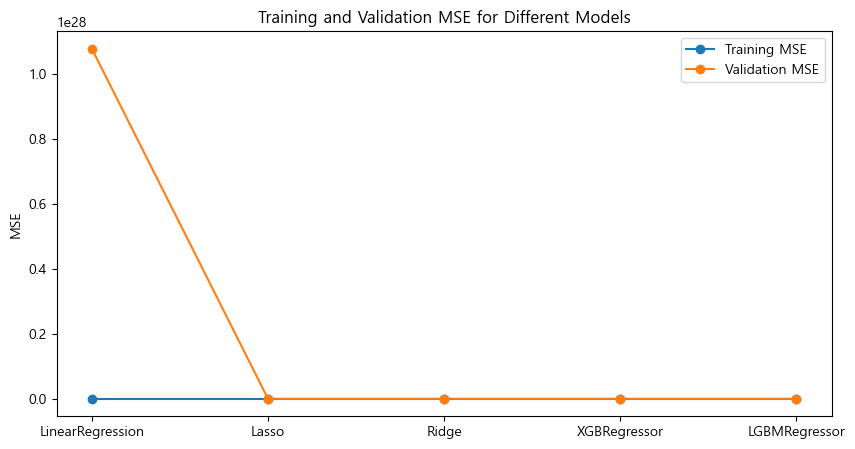

In [242]:
#결과 시각화
plot_mse_for_models_line(models, X_train_scaler, y_train, X_val_scaler, y_val)

In [243]:
#모델 test평가
evaluate_models_on_test(models, X_test_scaler, y_test)

Model Test Performance Evaluation:

Model            	Test MSE		Test R²
---------------------------------------------------------
LinearRegression 	5255399111014087838631198720.0000		-106850408761048044666880.00%
Lasso            	1535887.6391		68.77%
Ridge            	1537107.6535		68.75%
XGBRegressor     	834646.6237		83.03%
LGBMRegressor    	784981.3041		84.04%


# xgboost early stop

[0]	validation_0-rmse:4296.33679	validation_1-rmse:4249.82906
[1]	validation_0-rmse:3084.33187	validation_1-rmse:3058.94327
[2]	validation_0-rmse:2250.63942	validation_1-rmse:2251.89003
[3]	validation_0-rmse:1687.44403	validation_1-rmse:1715.51224


[4]	validation_0-rmse:1309.44977	validation_1-rmse:1368.91933
[5]	validation_0-rmse:1072.83930	validation_1-rmse:1165.77827
[6]	validation_0-rmse:919.58929	validation_1-rmse:1045.78861
[7]	validation_0-rmse:834.34108	validation_1-rmse:981.74912
[8]	validation_0-rmse:783.80583	validation_1-rmse:945.97795
[9]	validation_0-rmse:753.41234	validation_1-rmse:929.64169
[10]	validation_0-rmse:732.08428	validation_1-rmse:921.22781
[11]	validation_0-rmse:716.92521	validation_1-rmse:914.40586
[12]	validation_0-rmse:703.52562	validation_1-rmse:907.82179
[13]	validation_0-rmse:695.74299	validation_1-rmse:907.35467
[14]	validation_0-rmse:685.81057	validation_1-rmse:908.27326
[15]	validation_0-rmse:680.66352	validation_1-rmse:909.36962
[16]	validation_0-rmse:676.48777	validation_1-rmse:913.71262
[17]	validation_0-rmse:669.96106	validation_1-rmse:911.47647
[18]	validation_0-rmse:666.35728	validation_1-rmse:912.41083
[19]	validation_0-rmse:661.66070	validation_1-rmse:913.43494
[20]	validation_0-rmse:65

c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\vivid\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


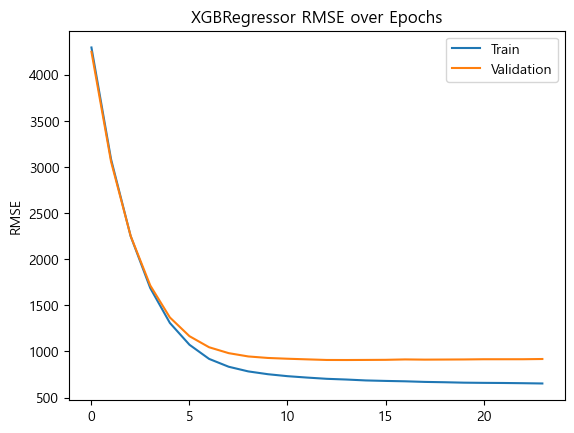

Xgboost Best Epoch:  13


In [244]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


reg_xgb = XGBRegressor()
eval_set = [(X_train_scaler, y_train), (X_val_scaler, y_val)]
reg_xgb.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
            early_stopping_rounds=10, verbose=True)
# Accessing the RMSE values stored during training
results = reg_xgb.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Validation')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBRegressor RMSE over Epochs')
plt.show()

best_epoch = reg_xgb.best_iteration
print("Xgboost Best Epoch: ", best_epoch)

# xgboost best_iteration으로 test 진행(EPOCH 13)

In [245]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행 (최적의 에포크를 사용)
pred_test = reg_xgb.predict(X_test_scaler, iteration_range=(0, best_epoch + 1))

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("XGBoost Test MSE: ", mse_test)
print("XGBoost Test R² Score: {:.2f}%".format(r2_test * 100))


XGBoost Test MSE:  796158.0508391268
XGBoost Test R² Score: 83.81%


# light gbm early stop 적용

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[37]	valid_0's rmse: 885.115	valid_0's l2: 783429


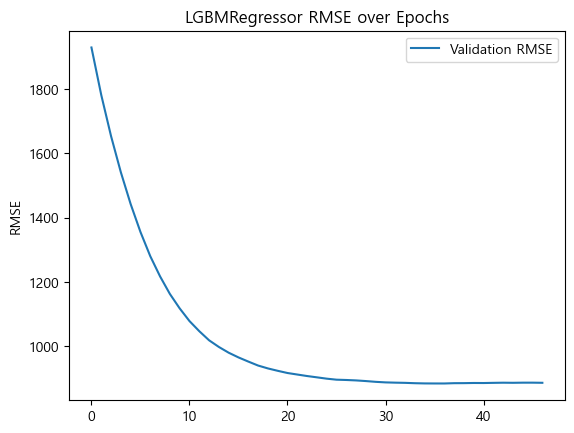

Best Iteration:  37


In [246]:
from lightgbm import LGBMRegressor, early_stopping
import matplotlib.pyplot as plt

# Initialize the model with verbosity settings
reg_lgbm = LGBMRegressor(verbose=-1)  # Set to -1 to suppress output, or a positive integer for verbosity
eval_set = [(X_val_scaler, y_val)]  # Evaluation set for early stopping

# Fit the model with early stopping
reg_lgbm.fit(X_train_scaler, y_train, eval_metric="rmse", eval_set=eval_set,
             callbacks=[early_stopping(stopping_rounds=10)])

# Accessing the RMSE values
results = reg_lgbm.evals_result_
epochs = len(results['valid_0']['rmse'])  # Adjust the key based on your evals_result structure
x_axis = range(0, epochs)

# Plotting
fig, ax = plt.subplots()
ax.plot(x_axis, results['valid_0']['rmse'], label='Validation RMSE')
ax.legend()
plt.ylabel('RMSE')
plt.title('LGBMRegressor RMSE over Epochs')
plt.show()

# Best iteration
best_iteration = reg_lgbm.best_iteration_
print("Best Iteration: ", best_iteration)


# LightGBM best_iteration으로 test 진행(EPOCH 37)

In [247]:
from sklearn.metrics import mean_squared_error, r2_score

# 테스트 데이터셋에 대한 예측 수행
pred_test = reg_lgbm.predict(X_test_scaler, num_iteration=best_iteration)

# 테스트 데이터셋에 대한 성능 평가
mse_test = mean_squared_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)

# 결과 출력
print("LightGBM Test MSE: ", mse_test)
print("LightGBM Test R² Score: {:.2f}%".format(r2_test * 100))


LightGBM Test MSE:  794304.0227155843
LightGBM Test R² Score: 83.85%
